In [1]:
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import our input dataset
hoops_df = pd.read_csv('../Resources/cbb.csv')
hoops_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [3]:
# Dropping Unnessary Columns
hoops_df = hoops_df.drop(["TEAM","SEED","CONF","G","YEAR"], axis=1)
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [4]:
tourney_list = hoops_df['POSTSEASON'].value_counts()
tourney_list

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [5]:
tourney_list_to_replace = list(tourney_list.index)

for place in tourney_list_to_replace:
  hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(place,"1")

hoops_df['POSTSEASON'].value_counts()

1    476
Name: POSTSEASON, dtype: int64

In [6]:
hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].fillna(0)

In [7]:
hoops_df['POSTSEASON'] = pd.to_numeric(hoops_df['POSTSEASON'])

In [8]:
y = hoops_df['POSTSEASON'].values
X = hoops_df.drop(['POSTSEASON'], 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
clf = RandomForestClassifier(random_state=47, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9299674267100977


[0.15471837 0.05471491 0.05763898 0.17406508 0.02629044 0.03140331
 0.03211459 0.02192383 0.02014884 0.02601087 0.02369314 0.01957982
 0.02116832 0.02855646 0.02462505 0.02297483 0.02030783 0.24006531]


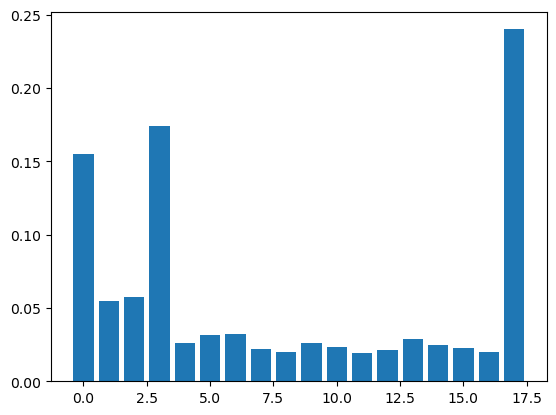

In [11]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
# plt.xticks(hoops_df.columns)
plt.show()

In [12]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=47))

In [13]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=47)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [14]:
X_train_scaled[0]

array([-0.80386683,  0.07515577,  1.19493641, -0.71016977, -0.7519212 ,
        0.46194434, -0.02610841,  1.14660141,  1.59144574,  2.24754175,
        1.13479686,  2.38823714, -0.66458316,  0.26059806, -0.44603311,
        0.65163987, -0.3465746 , -1.06222382])

In [15]:
X_selected_train_scaled[0]

array([-0.80386683,  1.19493641, -0.71016977, -1.06222382])

In [16]:
clf = RandomForestClassifier(random_state=47, n_estimators=100).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9169381107491856


In [17]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9141770776751765
Testing Score: 0.9136807817589576


In [18]:
clf2 = LogisticRegression()
clf2.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf2.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9125475285171103
Testing Score: 0.9185667752442996


In [19]:
y_true = y_test
y_pred = clf2.predict(X_selected_test_scaled)
confusion_matrix(y_true, y_pred)

array([[482,  18],
       [ 32,  82]])

In [20]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       500
           1       0.82      0.72      0.77       114

    accuracy                           0.92       614
   macro avg       0.88      0.84      0.86       614
weighted avg       0.92      0.92      0.92       614



In [21]:
clf2.predict(X_selected_test_scaled[0:10])

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
clf2.predict_proba(X_selected_test_scaled[0:10])

array([[9.83284317e-01, 1.67156829e-02],
       [3.27789234e-03, 9.96722108e-01],
       [5.87384671e-01, 4.12615329e-01],
       [9.94143416e-01, 5.85658419e-03],
       [9.99447998e-01, 5.52002446e-04],
       [9.92296394e-01, 7.70360606e-03],
       [9.37316493e-01, 6.26835069e-02],
       [9.98694789e-01, 1.30521145e-03],
       [9.98468498e-01, 1.53150222e-03],
       [9.11115793e-01, 8.88842066e-02]])

In [23]:
y_pred_proba_log = clf2.predict_proba(X_selected_test_scaled)[:,1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)

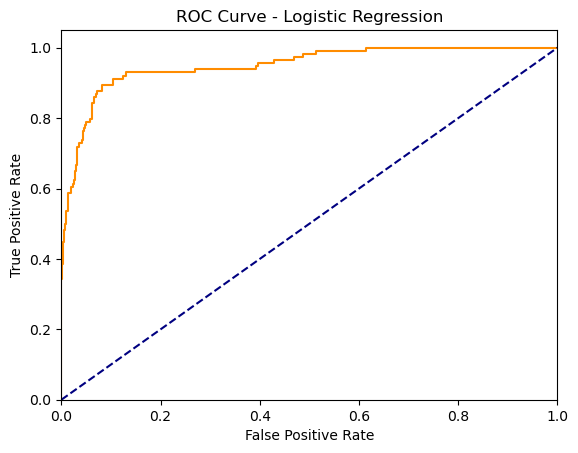

In [24]:
plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()

In [25]:
roc_auc_log = auc(fpr_log, tpr_log)
print(f"AUC for the Logistic Regression Model: {roc_auc_log}")

AUC for the Logistic Regression Model: 0.9489473684210527


In [26]:
# Import our input dataset
hoops20_df = pd.read_csv('../Resources/cbb20.csv')
hoops20_df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,33.6,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.4,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,Arkansas Pine Bluff,SWAC,29,4,80.1,104.3,0.0461,43.1,48.9,...,27.1,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0
349,350,Maryland Eastern Shore,MEAC,31,5,82.1,108.0,0.0411,40.5,51.0,...,26.2,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8
350,351,Mississippi Valley St.,SWAC,30,4,89.2,119.0,0.0350,43.0,54.0,...,23.5,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2
351,352,Kennesaw St.,ASun,29,1,82.2,112.2,0.0269,39.3,55.3,...,25.8,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8


In [27]:
df = hoops20_df.drop(["TEAM","RK","CONF","G"], axis=1)
df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,28,116.1,87.7,0.9616,53.7,43.7,18.7,18.6,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,26,114.5,88.4,0.9513,49.4,45.2,17.8,22.7,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
2,31,121.3,94.3,0.9472,57.5,47.6,15.3,18.4,33.6,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7
3,29,119.5,93.4,0.9445,59.7,46.6,18.0,18.8,26.4,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8
4,22,114.8,91.3,0.9326,52.6,43.3,18.1,15.8,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,4,80.1,104.3,0.0461,43.1,48.9,26.2,20.6,27.1,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0
349,5,82.1,108.0,0.0411,40.5,51.0,21.1,20.4,26.2,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8
350,4,89.2,119.0,0.0350,43.0,54.0,18.2,17.6,23.5,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2
351,1,82.2,112.2,0.0269,39.3,55.3,21.7,18.5,25.8,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8


In [28]:
selected = hoops20_df[['W', 'ADJDE', 'BARTHAG', 'WAB']]
selected.head()

,W,ADJDE,BARTHAG,WAB
0,28,87.7,0.9616,10.8
1,26,88.4,0.9513,8.5
2,31,94.3,0.9472,7.7
3,29,93.4,0.9445,6.8
4,22,91.3,0.9326,5.2


In [29]:
X = selected.values
scaler = StandardScaler().fit(X)

In [30]:
X_scaled = scaler.transform(X)

In [31]:
predictions = clf2.predict(X_scaled)
len(np.where(predictions == 1)[0])

59

In [32]:
hoops20_df["POSTSEASON"] = predictions
hoops20_df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,Arkansas Pine Bluff,SWAC,29,4,80.1,104.3,0.0461,43.1,48.9,...,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0,0
349,350,Maryland Eastern Shore,MEAC,31,5,82.1,108.0,0.0411,40.5,51.0,...,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8,0
350,351,Mississippi Valley St.,SWAC,30,4,89.2,119.0,0.0350,43.0,54.0,...,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2,0
351,352,Kennesaw St.,ASun,29,1,82.2,112.2,0.0269,39.3,55.3,...,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8,0
